# Data Science HW1

## Task 1

In [ ]:
#Imports
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
import time
import re
import numpy as np
import calendar
from time import strptime

In [ ]:
#Define column names for dataframe
column_names = ['title', 'author', 'publication_date', 'format', 'current_price', 'original_price']

#Define pandas dataframe to hold data from scraping
data = pd.DataFrame(columns = column_names)

For Web scrapping, We look at at each page, then get each item info block and save all information needed in that block.

In [ ]:
#Web scrapping

#There are 34 pages total
for i in range(34):

  #Get website html
  url = "https://www.bookdepository.com/bestsellers?page=" + str(i+1)
  response = requests.get(url)
  html = response.content
  soup = bs(html, "lxml")

  #Get all values from each book on the current loaded webpage
  tmp = soup.find_all("div", class_="item-info")
  for t in tmp: 
    a = (t.select("div.item-info h3.title")[0].get_text(strip=True))
    b = (t.select("div.item-info p.author")[0].get_text(strip=True))
    c = (t.select("div.item-info p.published")[0].get_text(strip=True))
    d = (t.select("div.item-info p.format")[0].get_text(strip=True))
    
    tmp2 = t.select("div.item-info p.price")
    if tmp2:
        tmp3 = re.split('(U)',tmp2[0].get_text(strip=True))
        e = (tmp3[1] + tmp3[2])
        if(len(tmp3) > 3):
            f = (tmp3[3] + tmp3[4])
        else:
            f = (tmp3[1] + tmp3[2])    
    else:
        e = np.nan
        f = np.nan

    #Append current values to dataframe
    tmp_list = [a, b, c, d, e, f]
    data_tmp = pd.DataFrame([tmp_list], columns = column_names)
    data = data.append(data_tmp)
    
#Set basic 0-x index values    
data.index = [x for x in range(0, len(data.values))]

In [ ]:
data.to_csv("bestsellers.csv")

print(data)

                                                  title               author  \
0     It Ends With Us: The most heartbreaking novel ...       Colleen Hoover   
1                     The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid   
2                                    Death to Jar Sauce  Nat's What I Reckon   
3                                  The Midnight Library            Matt Haig   
4                              The Body Keeps the Score  Bessel van der Kolk   
...                                                 ...                  ...   
1015                                           Outliers     Malcolm Gladwell   
1016                      The Brain That Changes Itself        Norman Doidge   
1017                            The Old Man and the Sea     Ernest Hemingway   
1018                                            Cultish       Amanda Montell   
1019                   The Hard Thing About Hard Things         Ben Horowitz   

     publication_date     format curren

## Task 2

### (a)

For cleaning the data, we wish to drop null values, strip the publication date into three columns, drop publication date column, and remove 'US$' from all prices. Then convert all values that should be numbers.

In [ ]:
#Start by dropping Null values
data_cleaned = data
data_cleaned.dropna(inplace = True)

#Split publication date into three columns, and drop publication date column
data_cleaned[['publication_day','publication_month','publication_year']] = data_cleaned.publication_date.str.split(expand=True)
data_cleaned = data_cleaned.drop(columns=['publication_date'])

#Convert publication_month from 'xxx' to integer
data_cleaned['publication_month'] = data_cleaned['publication_month'].apply(lambda x: strptime(x,'%b').tm_mon)

#Arrange publication columns to be where the old publication date was
data_cleaned = data_cleaned[['title', 'author', 'publication_day', 'publication_month','publication_year','format','current_price','original_price']]

#Remove 'US$' from all prices
tmp = (data_cleaned.current_price.str.split('$',expand=True)).drop(columns=[0])
tmp1 = (data_cleaned.original_price.str.split('$',expand=True)).drop(columns=[0])

data_cleaned[['current_price']] = tmp
data_cleaned[['original_price']] = tmp1

# convert just columns that should be numeric
data_cleaned[["current_price", "original_price", "publication_day","publication_month","publication_year"]] = data_cleaned[["current_price", "original_price", "publication_day","publication_month","publication_year"]].apply(pd.to_numeric)


In [ ]:
print(data_cleaned)

                                                  title               author  \
0     It Ends With Us: The most heartbreaking novel ...       Colleen Hoover   
1                     The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid   
2                                    Death to Jar Sauce  Nat's What I Reckon   
3                                  The Midnight Library            Matt Haig   
4                              The Body Keeps the Score  Bessel van der Kolk   
...                                                 ...                  ...   
1015                                           Outliers     Malcolm Gladwell   
1016                      The Brain That Changes Itself        Norman Doidge   
1017                            The Old Man and the Sea     Ernest Hemingway   
1018                                            Cultish       Amanda Montell   
1019                   The Hard Thing About Hard Things         Ben Horowitz   

      publication_day  publication_mont

In [ ]:
print(data_cleaned.dtypes)

title                 object
author                object
publication_day        int64
publication_month      int64
publication_year       int64
format                object
current_price        float64
original_price       float64
dtype: object


### (b) 

In [ ]:
data_cleaned.to_csv("bestsellers-cleaned.csv")

### (c) 

In [ ]:
after_2019 = data_cleaned.loc[data_cleaned["publication_year"] >= 2019, ["title", "author", "current_price"]]
print(after_2019)

                                                title               author  \
1                   The Seven Husbands of Evelyn Hugo  Taylor Jenkins Reid   
2                                  Death to Jar Sauce  Nat's What I Reckon   
3                                The Midnight Library            Matt Haig   
6                      Beautiful World, Where Are You         Sally Rooney   
7                                 The Love Hypothesis        Ali Hazelwood   
...                                               ...                  ...   
994     Hokusai: The Great Picture Book of Everything        Timothy Clark   
1006  Bridgerton: The Duke and I (Bridgertons Book 1)          Julia Quinn   
1008              Peppa Pig: The Official Annual 2022            Peppa Pig   
1012                                 English Pastoral        James Rebanks   
1018                                          Cultish       Amanda Montell   

      current_price  
1             13.79  
2             22.77

### (d) 

Text(0, 0.5, 'Original Price')

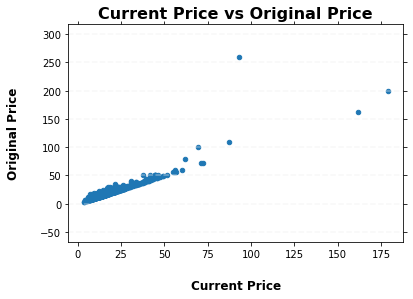

In [ ]:
ax = data_cleaned.plot.scatter(x = 'current_price', y = 'original_price')


# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
ax.set_title("Current Price vs Original Price",weight='bold',size='16')

# Set x-axis label
ax.set_xlabel("Current Price", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Original Price", labelpad=20, weight='bold', size=12)

### (e) 

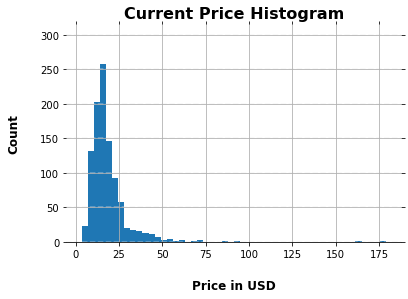

In [ ]:
ax = data_cleaned.hist(column='current_price',bins=50)

ax = ax[0]
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Current Price Histogram",weight='bold',size='16')

    # Set x-axis label
    x.set_xlabel("Price in USD", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

### (f) 

In [ ]:
grouped_data_cleaned = data_cleaned.groupby('publication_year')


mean_data = grouped_data_cleaned['current_price'].mean().reset_index().rename(columns = {"current_price": "mean_current_price"})

print(mean_data)

    publication_year  mean_current_price
0               1982            6.530000
1               1991           10.430000
2               1992            8.250000
3               1993           25.260000
4               1994           11.943333
5               1995           10.105000
6               1996            5.610000
7               1997            8.120000
8               1998           25.625000
9               1999           11.992857
10              2000           14.840000
11              2001           12.236667
12              2002           13.173333
13              2003           17.734000
14              2004           12.885000
15              2005           12.862222
16              2006           12.398571
17              2007           10.805000
18              2008           13.455833
19              2009           16.380000
20              2010           12.798182
21              2011           14.082500
22              2012           13.444400
23              

Text(0, 0.5, 'Mean Current Price')

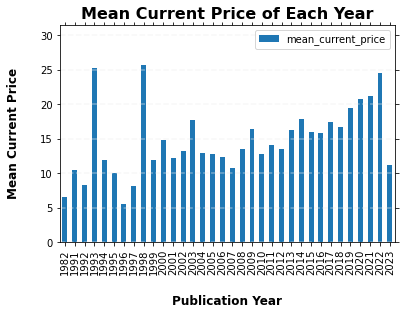

In [ ]:
ax = mean_data.plot.bar(x='publication_year', y='mean_current_price')

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
ax.set_title("Mean Current Price of Each Year",weight='bold',size='16')

# Set x-axis label
ax.set_xlabel("Publication Year", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Mean Current Price", labelpad=20, weight='bold', size=12)